# Indian Food Similarity Analysis

In [76]:
"""
by Yasaswi Sai Niharika Avula(avula1y), Charan Sai Guntupalli(guntu1c)

This script allows the user to print to the console all columns in the
comma seperated value file. It is assumed that the first row of the .csv file is the
location of the columns.

This tool accepts comma separated value files (.csv) as well as excel
(.xls, .xlsx) files.

This script requires that `pandas`,`numpy`,`seaborn`,`matplotlib` be installed within the Python
environment you are running this script in to conduct Exploratory Data Ananlysis on indian_food.csv 
for finding similarity in the different indian foods

This file contains the following flow:

    * Initial Data Exploration
    * Data Cleaning & Preparation
    * Analysis & Representation    
"""
# Importing all required libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Reading the data set
food=pd.read_csv("indian_food.csv")

# Initial Data Exploration

In [78]:
# Count of rows and columns
food.shape

(255, 9)

In [79]:
#Printing the first 5 dataset attributes
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [80]:
#Printing the lasst 5 dataset attributes
food.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [81]:
# Printing all the relevant information
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [82]:
# Printing the information of numeric attributes
food.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [83]:
# Number of unique values for each attribute
food.nunique()

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      5
course              4
state              25
region              7
dtype: int64

In [84]:
food.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [85]:
# Unique values
print(food['diet'].unique())
print(food['flavor_profile'].unique())
print(food['course'].unique())
print(food['region'].unique())
print(food['state'].unique())

['vegetarian' 'non vegetarian']
['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'starter' 'snack']
['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']


In [86]:
#hihghest cooking timed dish
idx = food["cook_time"].idxmax()
food.iloc[idx]

name                                   Shrikhand
ingredients       Curd, sugar, saffron, cardamom
diet                                  vegetarian
prep_time                                     10
cook_time                                    720
flavor_profile                             sweet
course                                   dessert
state                                Maharashtra
region                                      West
Name: 62, dtype: object

In [87]:
idx = food["prep_time"].idxmax()
food.iloc[idx]

name                                                   Pindi chana
ingredients       Fennel, tea bags, tomato, kasuri methi, cinnamon
diet                                                    vegetarian
prep_time                                                      500
cook_time                                                      120
flavor_profile                                               spicy
course                                                 main course
state                                                       Punjab
region                                                       North
Name: 114, dtype: object

# Data Cleaning and Preparation

In order to make it easier to navigate, I'll modify the ingredients column from a single string to a list of strings.

The 'region' column has a null value, but since there are no null entries for state, I assume I'll be able to fill this entry out using the other information.

Both the flavor profile, region, and state columns have a -1 value, which I'll modify to 'others' for the time being because I'm not sure what the correct entry is.

In the preparation and cooking time columns, there are also -1 values; I'll change these to 0s so they're easier to work with.

In [88]:
# Turning the ingredients entry into list instead of a single string
ingredients = []

for row in range(len(food)):
    ing = food['ingredients'][row].replace(" ", "").split(',')
    ingredients.append(ing)
    
food['ingredients'] = ingredients
food.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [89]:
# Identifying the null value and fixing it 
food[food['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"[Wholewheatflour, muskmelonseeds, poppyseeds, ...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [90]:
# Our null value comes from the state of Uttar Pradesh; let's see if there are any other meals from this state so we can look into their region.
food[food['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"[Maida, cornflour, bakingsoda, vinegar, curd, ...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"[Firmwhitepumpkin, sugar, kitchenlime, alumpow...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"[Condensedmilk, sugar, spices, nuts]",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"[Cornflour, ghee, dryfruits]",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"[Moongdal, rava, garammasala, dough, fennelseeds]",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"[Paneer, potato, cream, cornflour, garammasala]",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"[Bottlegourd, garammasalapowder, gramflour, gi...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"[Greenbeans, potatoes, khuskhus, lowfat, garam...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"[Wholewheatflour, muskmelonseeds, poppyseeds, ...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [91]:
# As we can see that the state 'Uttar pradesh' has all the values from 'North' so i am changing the null value to north
# Changing the entry 
food['region'] = food['region'].replace(np.nan, 'North')
food[food['state'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


 After changing, I have just printed the output. We can observe that there is no null value now.

 Now, for -1 values:

In [92]:
# Replacing weird entries with values that makes more sense
food['prep_time'] = food['prep_time'].replace(-1, 0)
food['cook_time'] = food['cook_time'].replace(-1, 0)
food['flavor_profile'] = food['flavor_profile'].replace('-1', 'others')
food['region'] = food['region'].replace('-1', 'Others')
food['state'] = food['state'].replace('-1', 'Others')

print(food['flavor_profile'].unique()) # printing unique flavors
print(food['region'].unique()) # printing the unique regions
print(food['state'].unique()) # printing the unique states
print(food.describe())

['sweet' 'spicy' 'bitter' 'others' 'sour']
['East' 'West' 'North' 'Others' 'North East' 'South' 'Central']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' 'Others' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
        prep_time   cook_time
count  255.000000  255.000000
mean    31.223529   34.639216
std     72.502844   48.185452
min      0.000000    0.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [93]:
food['Time'] = food['prep_time'] + food['cook_time']
food.head(10) #Top 10 Shortest Meals per Course

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Time
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East,55
5,Imarti,"[Sugarsyrup, lentilflour]",vegetarian,10,50,sweet,dessert,West Bengal,East,60
6,Jalebi,"[Maida, cornflour, bakingsoda, vinegar, curd, ...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,60
7,Kaju katli,"[Cashews, ghee, cardamom, sugar]",vegetarian,10,20,sweet,dessert,Others,Others,30
8,Kalakand,"[Milk, cottagecheese, sugar]",vegetarian,20,30,sweet,dessert,West Bengal,East,50
9,Kheer,"[Milk, rice, sugar, driedfruits]",vegetarian,10,40,sweet,dessert,Others,Others,50


 So everything is looking good now and therefore data cleaning is done and it is ready for furthur steps.

# Analysis & Representation

# 1.Display the data using a number line(Line Plot).

<AxesSubplot:>

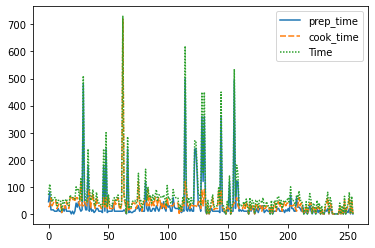

In [94]:
# Line plot displays data using a number line.
sns.lineplot(data=food)

There is only one food item with a cook time of 700. All of the remaining items have a cook time of less than 150 minutes.

The maximum prep time is 500, and only a few items have prep times in the range of 100-400; the rest have prep times of less than 50.

# 2. Display a figure based on diet 

<AxesSubplot:xlabel='diet', ylabel='count'>

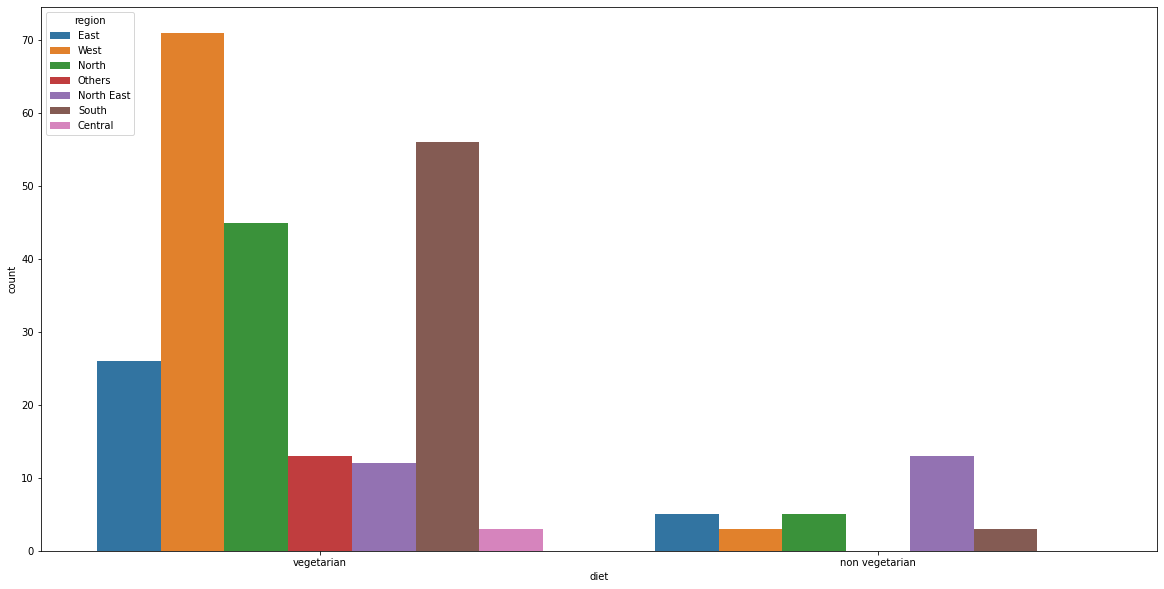

In [95]:
# Displaying the diet
plt.figure(figsize=(20,10))
sns.countplot(x = 'diet',data = food[food.region!='-1'], hue = 'region')

# 3. Find the Mean and Median for preptime and cooktime 

In [96]:
# Mean and median for preptime and cooktime based on flavour profile
food[food.flavor_profile!='-1'].groupby('flavor_profile').agg(['mean',np.median])

prep_time         cook_time              Time       
                     mean median       mean median       mean median
flavor_profile                                                      
bitter          15.000000     15  37.500000     35  52.500000   47.5
others          36.379310     10  22.758621     20  59.137931   35.0
sour            10.000000     10  10.000000     10  20.000000   20.0
spicy           32.556391     10  31.000000     30  63.556391   50.0
sweet           28.488636     10  44.204545     30  72.693182   50.0

# 4. Show a Heatmap

<AxesSubplot:>

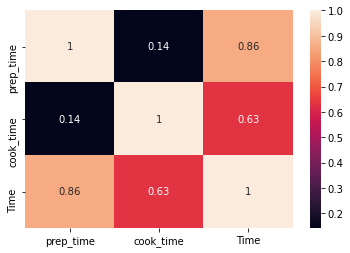

In [97]:
# Displaying a heatmap
corr=food.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

From the given graph we can observe that cook time and prep time are not dependent on each other.

# 5. Display a histogram

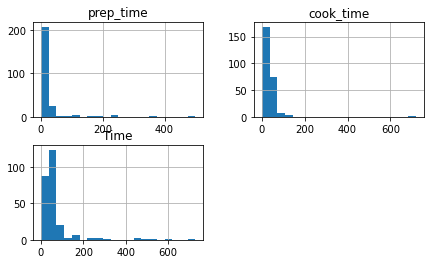

In [98]:
# This gives a histogram with height as 4 and with width as 7
food.hist(figsize=(7, 4), bins=20, xlabelsize=10, ylabelsize=10); 

There are almost 200 recipes that take less than 25 minutes to prepare.

About 160 dishes have a cook time of less than 25 minutes, and 70 have a cook time of 25 to 50 minutes.

# 6. Display a boxplot

<AxesSubplot:>

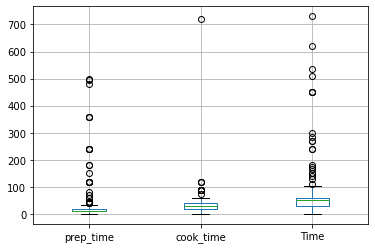

In [99]:
# Printing a box plot which is a graphical representation of numerical data groupings based on their quartiles.
food.boxplot()

There are too many outliers in prep time.

In comparison to prep time, cook time has a far lower frequency of outliers.

# 7. Display a catplot

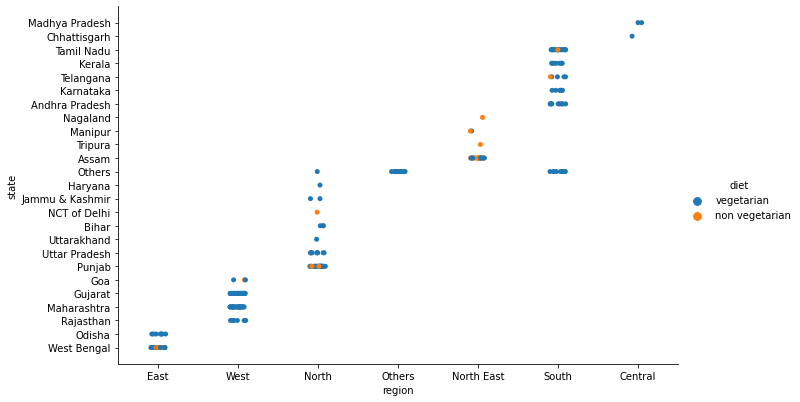

In [100]:
# Printing a graph based on reqion, state and diet
sns.catplot(data=food, x="region", y="state", hue="diet", height=5.5, aspect=1.75)

The majority of the menu options are vegetarian.

Only a small percentage of them follow a non-vegetarian diet.

Non-vegetarian foods may be found in West Bengal, Punjab, Delhi, and Assam, among other places.

In comparison to the rest of the country, the North Eastern area has more non-vegetarian goods.

The majority of the dishes are from the Southern United States.

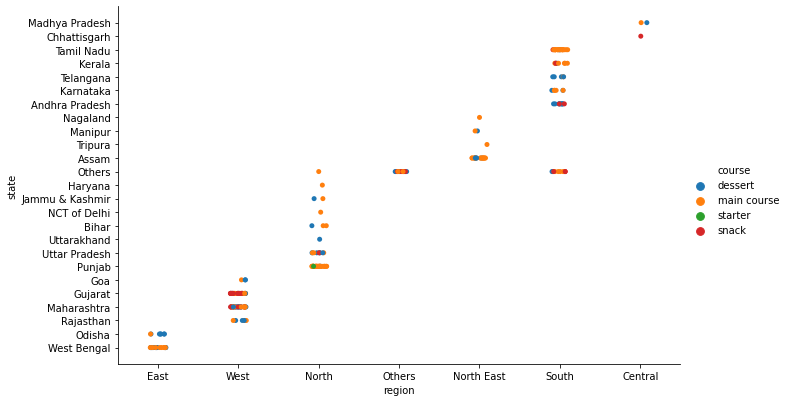

In [101]:
# Printing a graph based on reqion, state and course
sns.catplot(data=food, x="region", y="state", hue="course", height=5.5, aspect=1.75)

The majority of the dishes are main courses.

Only a handful of them are newcomers.

The states with starts are West Bengal, Punjab, Uttar Pradesh, Assam, and Tamil Nadu.

The center area does not have any starters.

The foods from the center area are the fewest.

# 8. Display barplot to show comparison between flavour_profile,cook_time and diet

<AxesSubplot:xlabel='flavor_profile', ylabel='cook_time'>

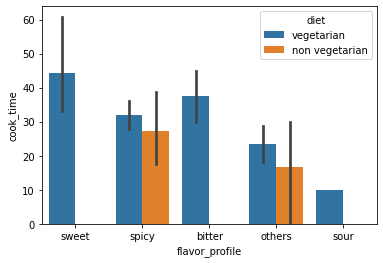

In [102]:
# Printing a barplot which shows the comparisons between discrete categories
sns.barplot(x="flavor_profile", y="cook_time", hue="diet", data=food)

Sweet foods take the longest to prepare (45 minutes), and they're all vegetarian.

Sour foods take the shortest amount of time to prepare (10 minutes) and are also vegetarian.

Vegetarian and non-vegetarian spice recipes are available.

Bitter foods take the second-longest time to prepare and are solely vegetarian.

We provide a variety of vegetarian and non-vegetarian foods which comes under others.

# 9. Display a figure which shows the count for each state

<AxesSubplot:xlabel='count', ylabel='state'>

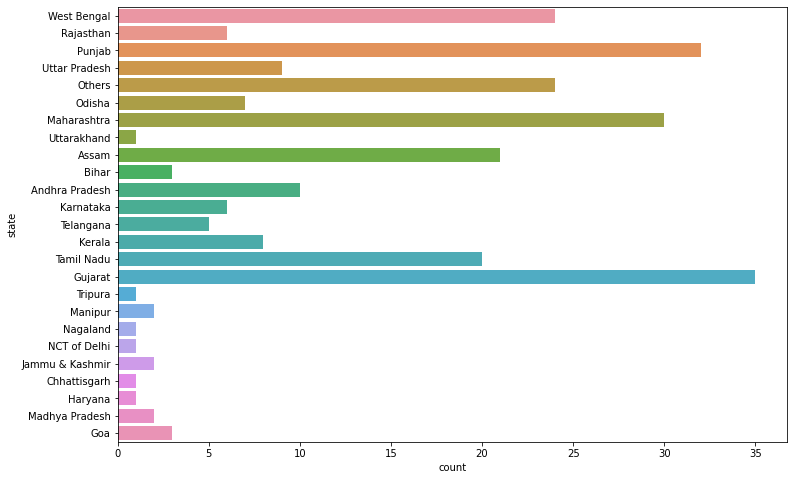

In [103]:
# It uses bars to display the number of data in each category bucket.
plt.figure(figsize=(12,8))
sns.countplot(data=food, y="state")

Gujarat provides the majority of the food products in this collection. There are around 35 pieces in all.

Many cuisine products from Punjab, Mahrastra, and West Bengal are available.

Haryana, Nagaland, Chhattisgarh, Delhi, and other states have extremely few food products.

# 10.Display a pairplot based on flavour_profile

C:\Users\15616\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\15616\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\15616\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


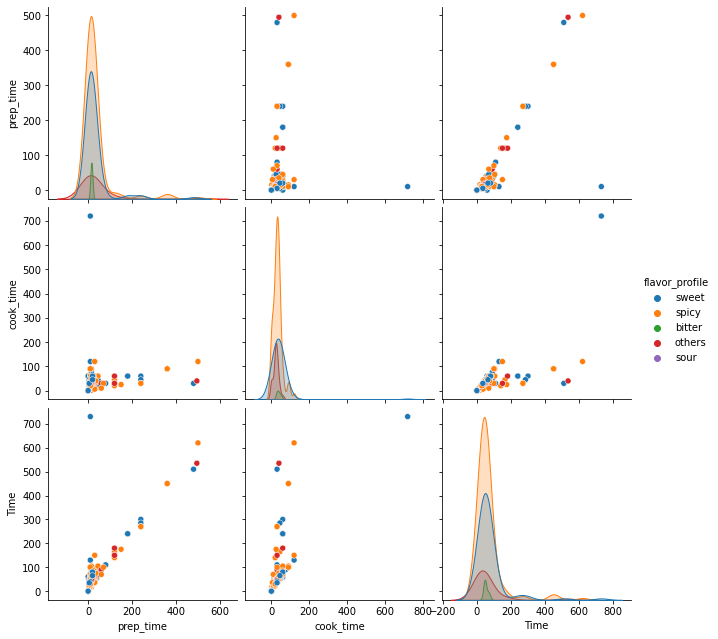

In [104]:
# Printing a pair plot :A pairs plot is a scatterplot matrix that shows the pairwise association between multiple variables in a dataset.
sns.pairplot(data=food,hue="flavor_profile",height=3)

The cook time and prep time for spicy recipes are the longest.

The cook time and prep time for sweet foods are the second highest.

The cook time for a sweet food is the longest, while the prep time is the shortest.

The majority of the recipes have a cook time of less than 100 minutes and a prep time of less than 200 minutes.

# 11. Display a stripplot based on course and prep_time

<AxesSubplot:xlabel='course', ylabel='prep_time'>

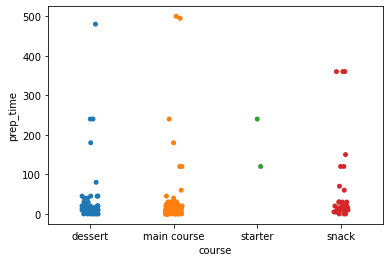

In [105]:
#Printing a stripplot: A stripplot displays all of the data as well as a depiction of the underlying distribution.
sns.stripplot(x="course",y="prep_time",data=food)

Few items(3) from the main course and dessert have a prep time of about 500 minutes.

To begin, the minimum prep time is roughly 125 minutes and the maximum prep time is around 250 minutes.

All of the starters have a prep time of less than 200 minutes, with the exception of a couple that have a prep time of approximately 375 minutes.